In [51]:
## Import Numpy, Pandas, Matplotlib, and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import label encoder and train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Import Logistic Regression, Naive Bayes, Support Vector Machine, Decision Tree, and Random Forest, Ridge class
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Import performance metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

# ## libraries for ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# from tensorflow import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, LSTM

In [52]:
# ## warning
# import warnings
# warnings.filterwarnings('ignore')

In [53]:
## load my dataset
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [54]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [55]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [56]:
df['gill-color'].value_counts()

gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64

In [57]:
# check for nulls
# code seaborn
# clean data

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

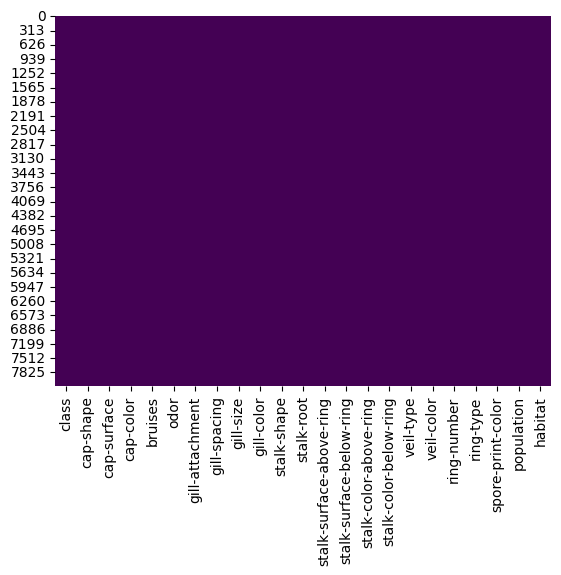

In [59]:
# # check for nulls
# df.isnull().sum()
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.show()

In [60]:
# df.isnull().sum()

In [61]:
# There are no missing values
# All classes are in string format. We will need lable enconding to convert these into integers
# but first i need to select relevant features since there are 22.
# i will encode them all first. use feature importance from decision tree

In [62]:
# first will encode all features excluding y ('class')
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()
    
# Encode the string features (all columns except the target)
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])


In [63]:
# # we recheck for missing values as well as info
# # df.isnull().sum()
# df.info()

                     Feature  Importance
8                 gill-color    0.336926
19         spore-print-color    0.213026
20                population    0.180644
7                  gill-size    0.131543
10                stalk-root    0.047169
3                    bruises    0.027773
9                stalk-shape    0.023229
14    stalk-color-below-ring    0.018354
21                   habitat    0.012781
2                  cap-color    0.004006
17               ring-number    0.002652
12  stalk-surface-below-ring    0.001897
15                 veil-type    0.000000
18                 ring-type    0.000000
16                veil-color    0.000000
0                  cap-shape    0.000000
13    stalk-color-above-ring    0.000000
1                cap-surface    0.000000
6               gill-spacing    0.000000
5            gill-attachment    0.000000
4                       odor    0.000000
11  stalk-surface-above-ring    0.000000


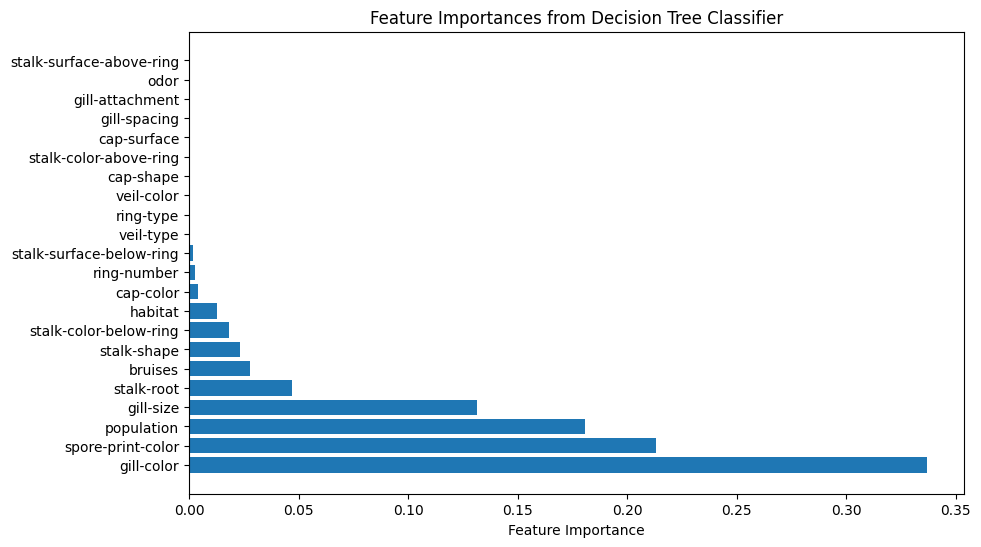

In [64]:
# Let's look at feature importance from Decision Tree algo
# Load your dataset (replace 'your_data.csv' with your data file)

X = df.drop('class', axis=1)  
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust the test_size and random_state as needed

# Initialize the model
model = DecisionTreeClassifier()

# Fit the model to your data
model.fit(X_train, y_train)

# Access feature importances
feature_importances = model.feature_importances_

# Create a pandas DataFrame to display the feature importances with their corresponding feature names
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Print or visualize the feature importances
print(importance_df)

# If you want to create a bar plot to visualize the feature importances:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Decision Tree Classifier')
plt.show()



In [65]:
# we will retain the following columns for our model
"""
features = data.loc[: ,'bruises', 'gill-size', 'gill-color', 
'stalk-shape',  'stalk-root', 'stalk-color-below-ring', 'spore-print-color', 'population', 'habitat'] 
"""

"\nfeatures = data.loc[: ,'bruises', 'gill-size', 'gill-color', \n'stalk-shape',  'stalk-root', 'stalk-color-below-ring', 'spore-print-color', 'population', 'habitat'] \n"

Definitions

In [66]:
""""
class: This column indicates whether a mushroom is "edible" or "poisonous." It is the target variable 
that you want to predict.

bruises: Specifies whether the mushroom has bruises. It is denoted as "bruises" (t) for true 
or "no bruises" (f) for false.

gill-size: Specifies the size of the gills. It is categorized as narrow (n) or broad (b).

gill-color: Describes the color of the gills. Colors include black (k), brown (n), buff (b), 
chocolate (h), gray (g), green (r), orange (o), pink (p), purple (u), red (e), white (w), and yellow (y).

stalk-shape: Indicates the shape of the stalk. It can be either enlarging (e) or tapering (t).

stalk-root: Describes the root structure of the stalk. Possible values include bulbous (b), 
club (c), cup (u), equal (e), rhizomorphs (z), rooted (r), and missing (?).
stalk-color-below-ring: Specifies the color of the stalk below the ring. 

Colors include brown (n), buff (b), cinnamon (c), gray (g), orange (o), pink (p), red (e), white (w), 
and yellow (y).

spore-print-color: Indicates the color of the spore print. Spore print colors include black (k), 
brown (n), buff (b), chocolate (h), green (r), orange (o), purple (u), white (w), and yellow (y).

population: Represents the population size of the mushroom. Categories include abundant (a), 
clustered (c), numerous (n), scattered (s), several (v), and solitary (y).

habitat: Describes the habitat where the mushroom is typically found. Possible habitats 
include grasses (g), leaves (l), meadows (m), paths (p), urban (u), waste (w), and woods (d).
"""

'"\nclass: This column indicates whether a mushroom is "edible" or "poisonous." It is the target variable \nthat you want to predict.\n\nbruises: Specifies whether the mushroom has bruises. It is denoted as "bruises" (t) for true \nor "no bruises" (f) for false.\n\ngill-size: Specifies the size of the gills. It is categorized as narrow (n) or broad (b).\n\ngill-color: Describes the color of the gills. Colors include black (k), brown (n), buff (b), \nchocolate (h), gray (g), green (r), orange (o), pink (p), purple (u), red (e), white (w), and yellow (y).\n\nstalk-shape: Indicates the shape of the stalk. It can be either enlarging (e) or tapering (t).\n\nstalk-root: Describes the root structure of the stalk. Possible values include bulbous (b), \nclub (c), cup (u), equal (e), rhizomorphs (z), rooted (r), and missing (?).\nstalk-color-below-ring: Specifies the color of the stalk below the ring. \n\nColors include brown (n), buff (b), cinnamon (c), gray (g), orange (o), pink (p), red (e), 

# EDA

In [67]:
# selected_columns = ['bruises', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-color-below-ring', 'spore-print-color', 'population', 'habitat']

# # Select the columns you want to include in the pairplot
# pairplot_data = df[['class'] + selected_columns]

# # Create the pairplot
# sns.pairplot(data = pairplot_data, hue='class')
# plt.show()
# # from sns plot below gilt color , habitat 


Distribution charts

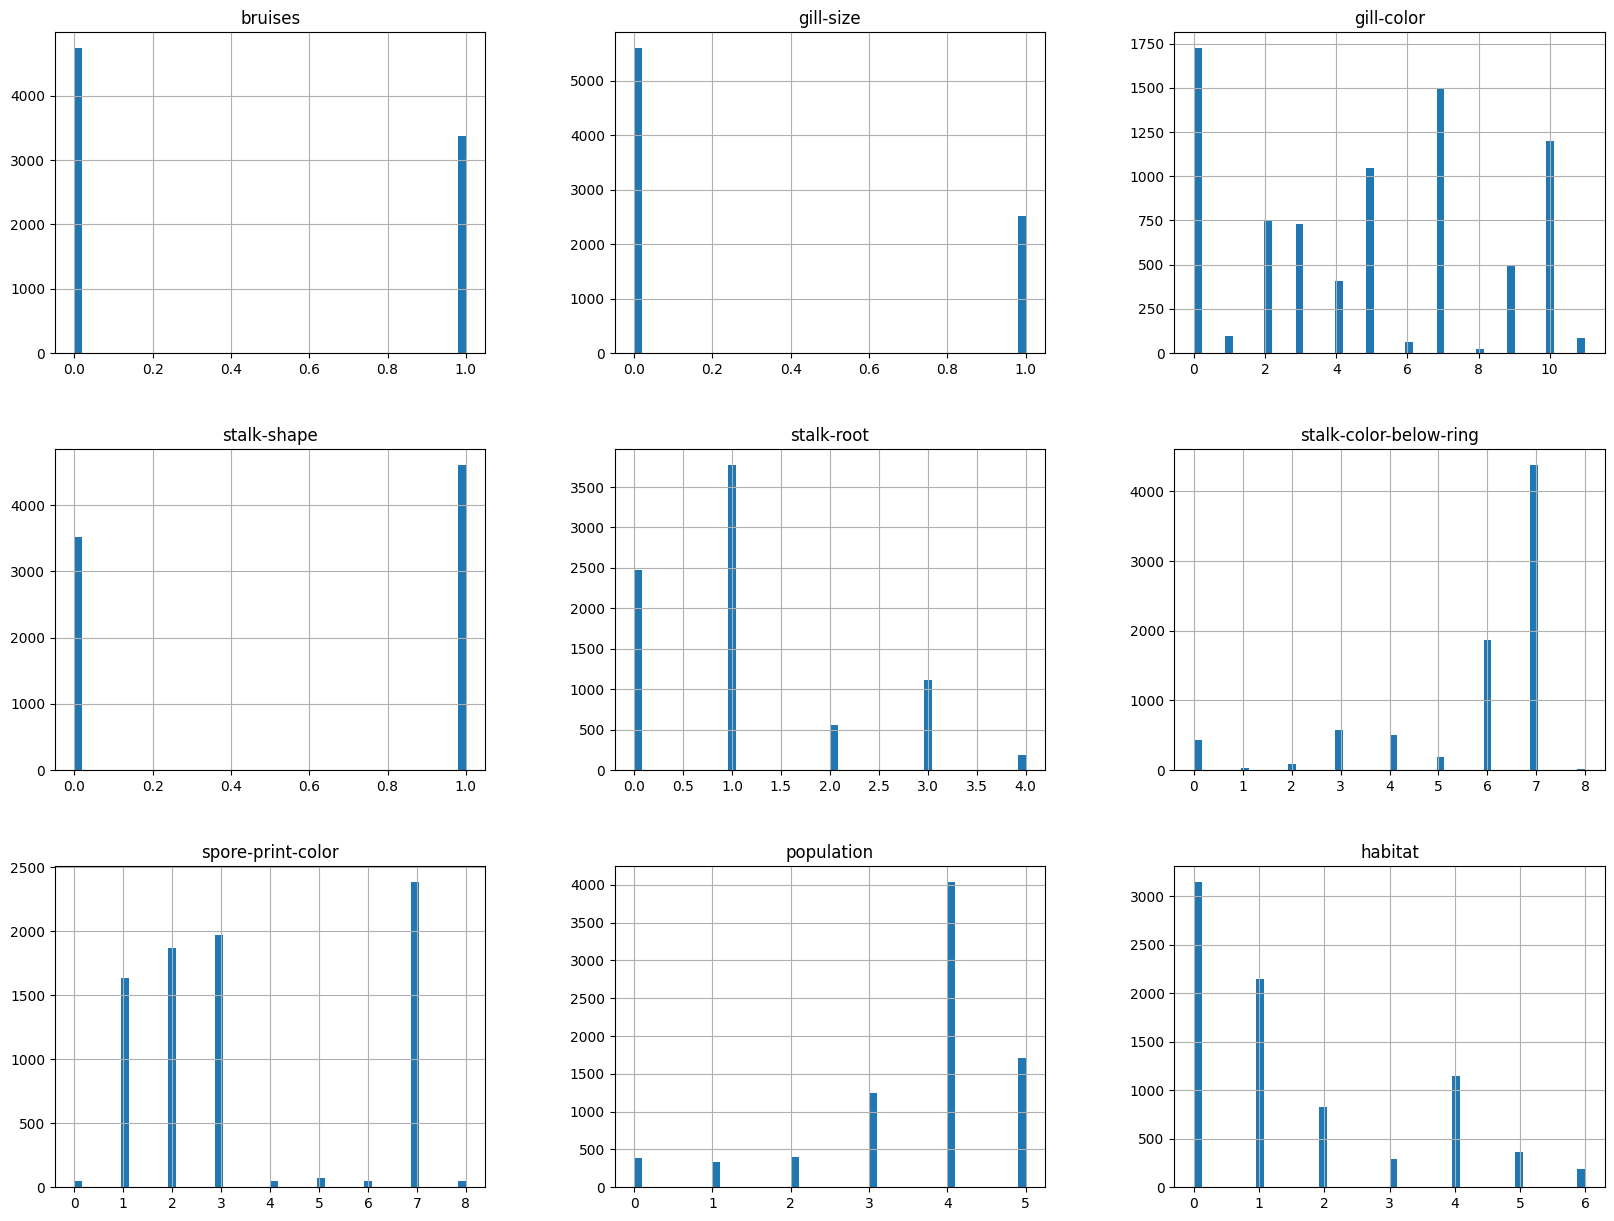

In [68]:
import matplotlib.pyplot as plt

# Specify the columns you want to create histograms for
columns_to_plot = ['bruises', 'gill-size', 'gill-color', 
'stalk-shape',  'stalk-root', 'stalk-color-below-ring', 'spore-print-color', 'population', 'habitat']

# Create histograms for the selected columns
df[columns_to_plot].hist(bins=50, figsize=(20, 15))
plt.show()




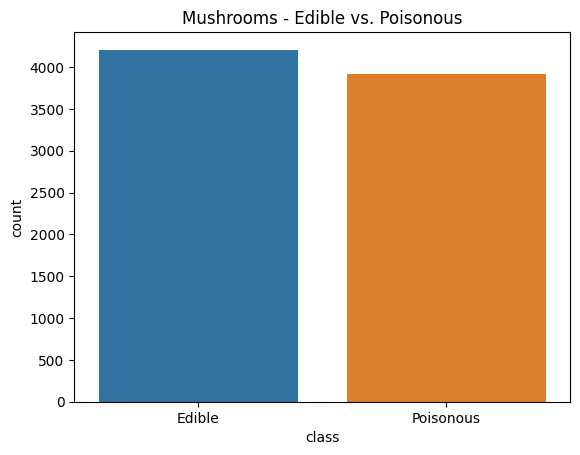

In [69]:
# Create a custom color palette
colors = ["#1f77b4", "#fb7c0c"]

# Plot the bar chart using Seaborn with 'class' as hue
sns.countplot(data=df, x='class', hue='class', palette=colors, legend=False)

# Set custom labels for the bars
plt.xticks([0, 1], ['Edible', 'Poisonous'])

plt.title("Mushrooms - Edible vs. Poisonous")
plt.grid(False)
plt.show()


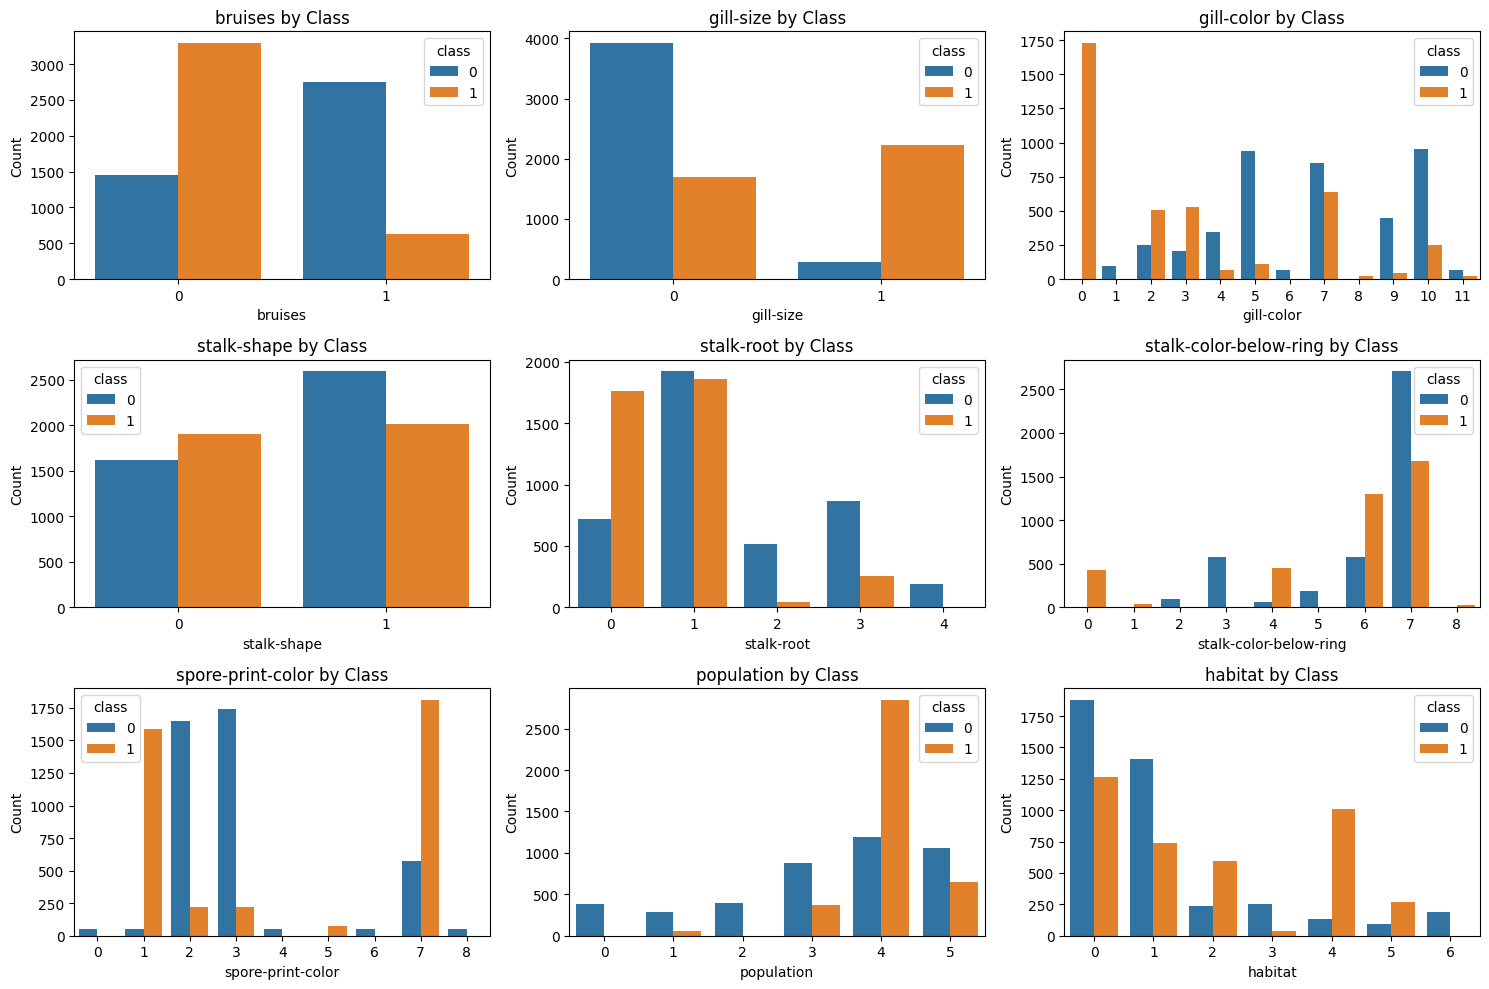

In [70]:
# Define the categorical columns you want to create bar charts for
categorical_columns = ['bruises', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-color-below-ring', 'spore-print-color', 'population', 'habitat']

# Define the number of rows and columns for subplots
num_rows = 3  # You can adjust this based on the number of columns you want to display
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Plot bar charts for each categorical column in a separate subplot
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(data=df, x=column, hue='class', ax=ax)
    ax.set_title(f'{column} by Class')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Remove any empty subplots if the number of columns is less than num_rows * num_cols
for i in range(len(categorical_columns), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [72]:
# correl vs target 
df.corr()["class"].sort_values()

gill-color                 -0.530566
bruises                    -0.501530
ring-type                  -0.411771
stalk-root                 -0.379361
gill-spacing               -0.348387
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
ring-number                -0.214366
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
stalk-shape                -0.102019
odor                       -0.093552
cap-color                  -0.031384
cap-shape                   0.052951
gill-attachment             0.129200
veil-color                  0.145142
spore-print-color           0.171961
cap-surface                 0.178446
habitat                     0.217179
population                  0.298686
gill-size                   0.540024
class                       1.000000
veil-type                        NaN
Name: class, dtype: float64

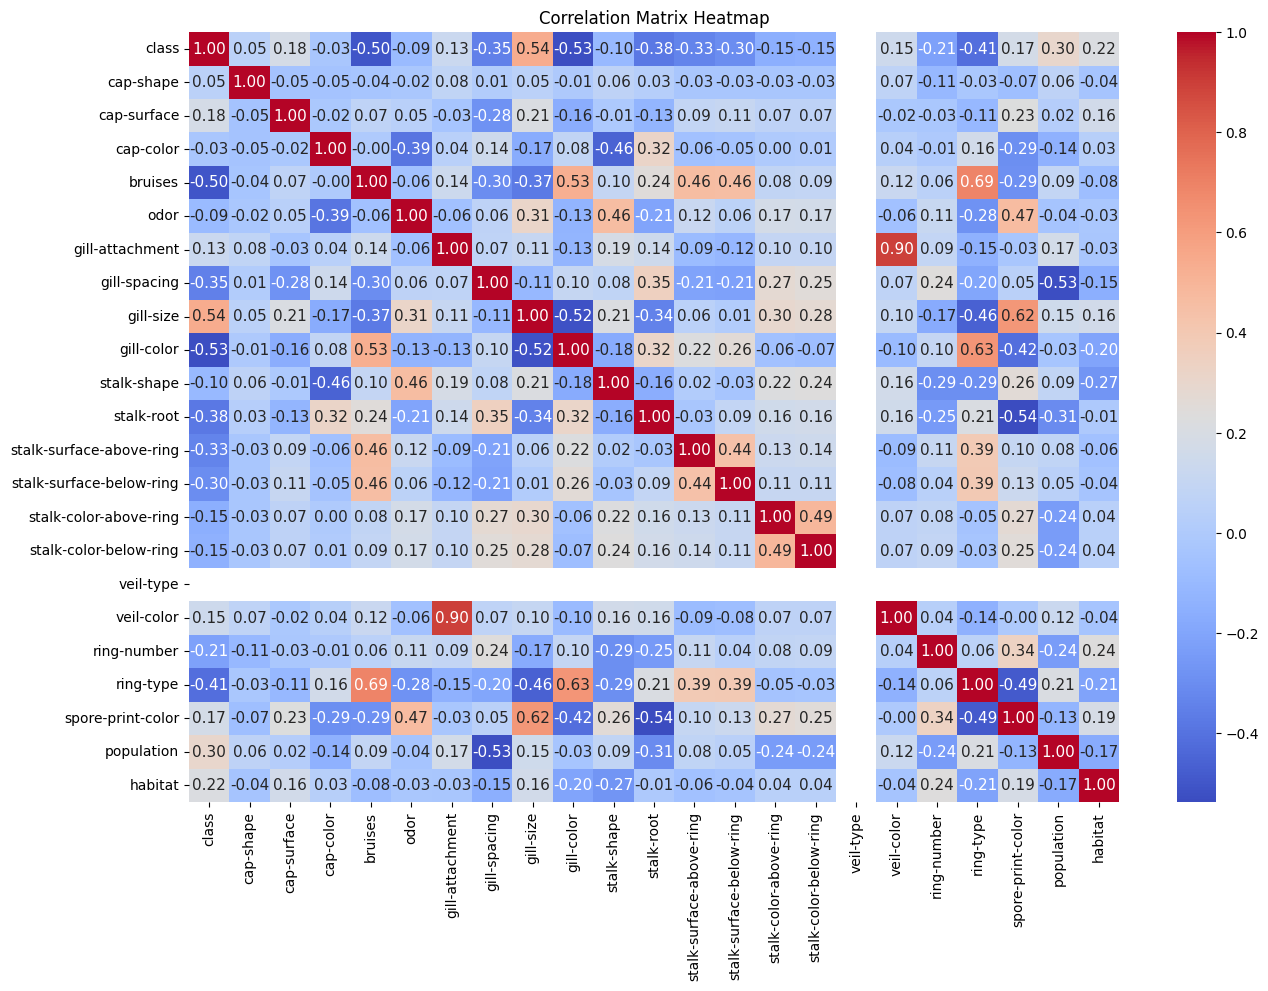

In [73]:
# # Define the categorical columns you want to create a correlation map for
# categorical_columns = ['class','bruises', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-color-below-ring', 'spore-print-color', 'population', 'habitat']

# # Create a DataFrame with the selected columns
# selected_data = df[categorical_columns]
# # Calculate the correlation matrix
# correlation_matrix = selected_data.corr()
correlation_matrix = df.corr()
# Create a correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt = ".2f", annot_kws={'size': 11})
plt.title("Correlation Matrix Heatmap", loc="center")
plt.show()

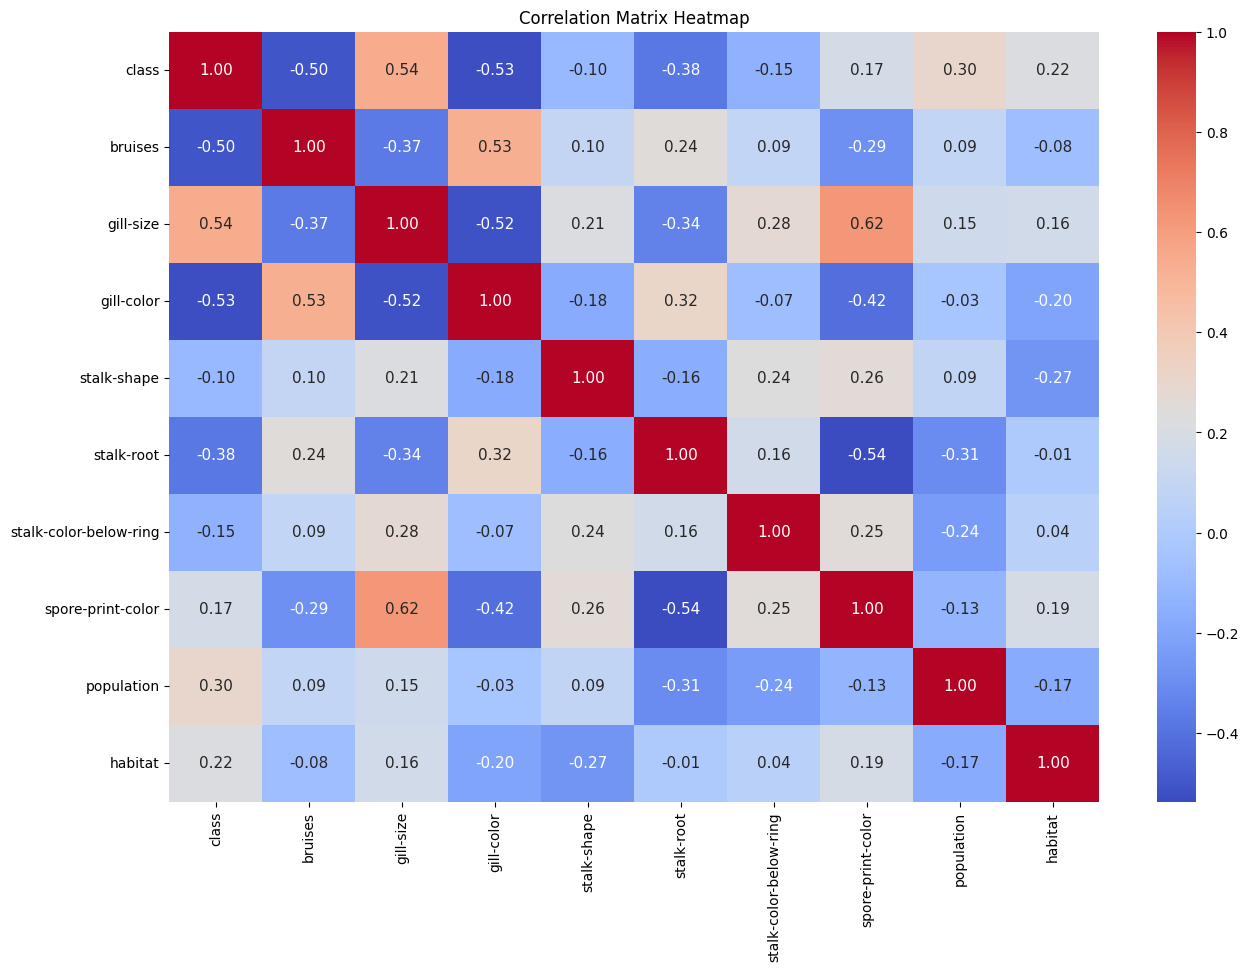

In [74]:
# Define the categorical columns you want to create a correlation map for
categorical_columns = ['class','bruises', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-color-below-ring', 'spore-print-color', 'population', 'habitat']

# Create a DataFrame with the selected columns
selected_data = df[categorical_columns]
# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt = ".2f", annot_kws={'size': 11})
plt.title("Correlation Matrix Heatmap", loc="center")
plt.show()

In [75]:
# Logistic regression
# Naive Bayes
# KNN
# Random forest
# SVM
# Decision Tree
# Artificial Neural Network

# Classifiers

In [76]:
# set features and target (shared by all classifiers)
features = df.loc[: ,['bruises', 'gill-size', 'gill-color', 
'stalk-shape',  'stalk-root', 'stalk-color-below-ring', 'spore-print-color', 'population', 'habitat']] 
 
y = df.loc[ :, 'class' ]

# Split the data into train and test sets with 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [77]:
X_train.shape

(6499, 22)

In [78]:
X_test.shape

(1625, 22)

# Logistic regression

In [79]:
# Create a logistic regression model
logr_model = LogisticRegression(random_state=0, max_iter=1000)
# Train the model
logr_model.fit(X_train, y_train)
# Make prediction using the test dataset on Logistic Classifier model

LogisticRegression(max_iter=1000, random_state=0)

In [80]:
# Make predictions on the test data
logr_y_pred = logr_model.predict(X_test)

# Calculate and print the model's accuracy score
accuracy = round(accuracy_score(y_test, logr_y_pred),4)
print("Logistic Regression Accuracy:", accuracy)
print()

# Print the model's classification report
print(classification_report(y_test,logr_y_pred))

Logistic Regression Accuracy: 0.9557

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       846
           1       0.96      0.95      0.95       779

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [81]:
# we need to assess how y_test and predictions look 
train =pd.DataFrame({"actual target y_test": y_test, "Predictions": logr_y_pred})

train['Difference'] = round((train['actual target y_test'] - train['Predictions']))

# Print the updated DataFrame
print(train)

      actual target y_test  Predictions  Difference
6506                     1            1           0
5656                     1            1           0
4908                     1            1           0
1384                     0            0           0
3305                     0            0           0
...                    ...          ...         ...
3602                     0            0           0
1169                     0            0           0
3650                     0            0           0
2828                     0            0           0
4376                     1            1           0

[1625 rows x 3 columns]


In [82]:
class_counts = df['class'].value_counts()
count_0 = class_counts[0]
# count_1 = class_counts[1]
print(class_counts)

class
0    4208
1    3916
Name: count, dtype: int64


Confusion Matrix:
[[815  31]
 [ 41 738]]

Accuracy from Logistic regression confusion matrix: 0.9557


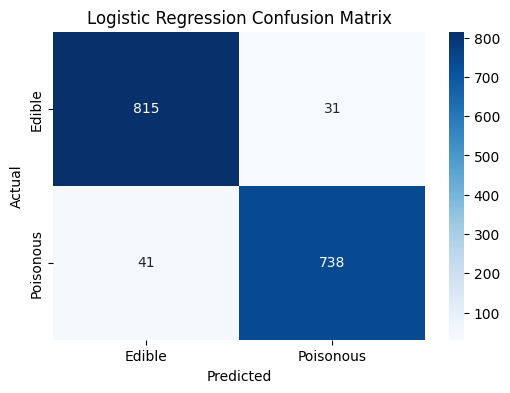

In [83]:
# LOGISTIC REGRESSION PERFORMANCE METRICS
# Create a confusion matrix
confusion = confusion_matrix(y_test, logr_y_pred)
print("Confusion Matrix:")
print(confusion)
# Calculate and print the accuracy based on the confusion matrix
accuracy_from_confusion = round((confusion[0][0] + confusion[1][1]) / len(y_test),4)
print()
print("Accuracy from Logistic regression confusion matrix:", accuracy_from_confusion)

cm_logr = confusion_matrix(y_test, logr_y_pred)
class_names = ["Edible", "Poisonous"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_logr, annot= True, fmt= "d", cmap= "Blues", xticklabels= class_names, yticklabels= class_names)
plt.xlabel( "Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Naive Bayes

In [84]:
# Create a Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

GaussianNB()

Naive Bayes Accuracy: 0.9188
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       846
           1       0.90      0.93      0.92       779

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625

Confusion Matrix:
[[768  78]
 [ 54 725]]

Accuracy from Naive Bayes confusion matrix: 0.9188


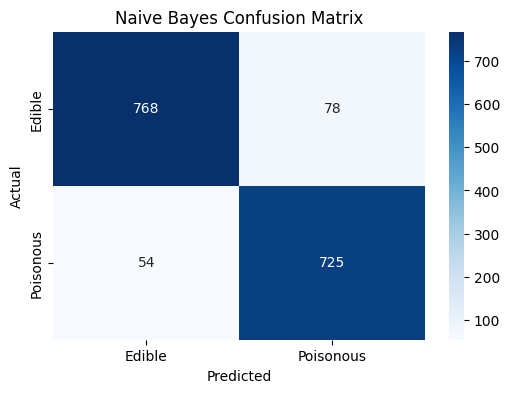

In [85]:
# Make predictions on the test data
nb_y_pred = nb_model.predict(X_test)

# Calculate and print the model's accuracy score
accuracy = round(accuracy_score(y_test, nb_y_pred), 4)
print("Naive Bayes Accuracy:", accuracy)

# Print the classification report
print(classification_report(y_test, nb_y_pred))

# Create a confusion matrix
confusion = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix:")
print(confusion)
# Calculate and print the accuracy based on the confusion matrix
accuracy_from_confusion = round((confusion[0][0] + confusion[1][1]) / len(y_test),4)
print()
print("Accuracy from Naive Bayes confusion matrix:", accuracy_from_confusion)

# create a visual for confusion matrix
cm_nb = confusion_matrix(y_test, nb_y_pred)
class_names = ["Edible", "Poisonous"]
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot= True, fmt= "d", cmap= "Blues", xticklabels= class_names, yticklabels= class_names)
plt.xlabel( "Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier

# Create a K-nearest neighbors model
knn_model = KNeighborsClassifier(n_neighbors = 3)
# Train the model on the training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[846   0]
 [  0 779]]

Accuracy from KNN confusion matrix: 1.0


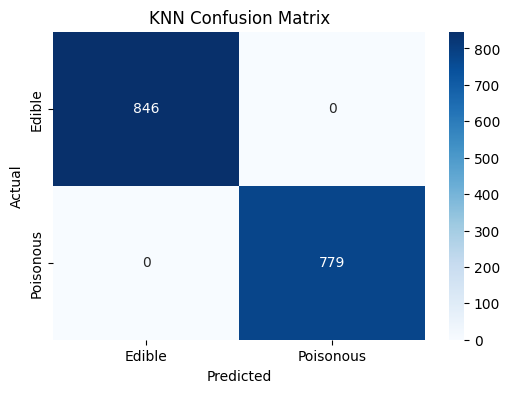

In [87]:
# Make predictions on the test data
knn_y_pred = knn_model.predict(X_test)

# KNN PERFORMANCE METRICS
# Print the model's classification report
print(classification_report(y_test, knn_y_pred))

# Create a confusion matrix
confusion = confusion_matrix(y_test, knn_y_pred)
print("Confusion Matrix:")
print(confusion)
# Calculate and print the accuracy based on the confusion matrix
accuracy_from_confusion = round((confusion[0][0] + confusion[1][1]) / len(y_test),4)
print()
print("Accuracy from KNN confusion matrix:", accuracy_from_confusion)

# create a visual for confusion matrix
cm_knn = confusion_matrix(y_test, knn_y_pred)
class_names = ["Edible", "Poisonous"]
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot= True, fmt= "d", cmap= "Blues", xticklabels= class_names, yticklabels= class_names)
plt.xlabel( "Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

Text(0, 0.5, 'Error rate')

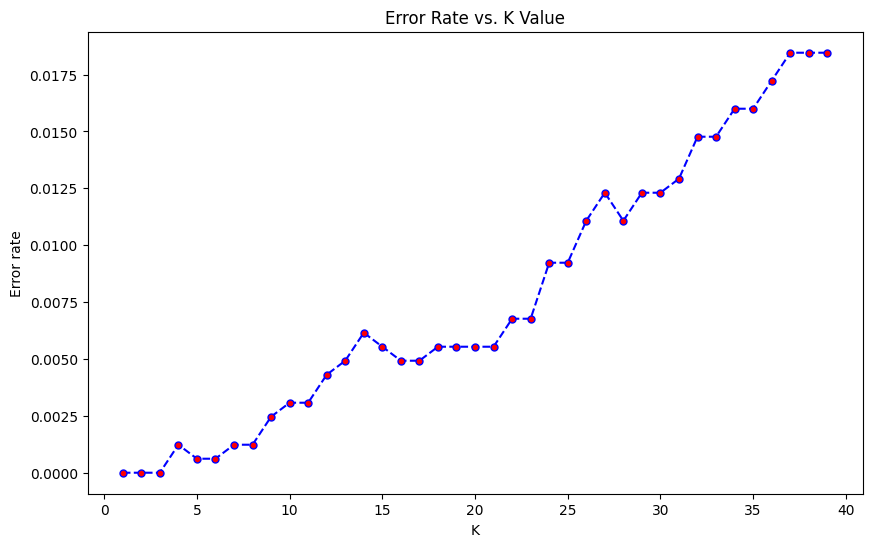

In [88]:
# Error rate
error_rate = []
for x in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= x)
    knn.fit(X_train, y_train)
    pred_x = knn.predict(X_test)
    error_rate.append(np.mean(pred_x != y_test)) # ave of my where my pred != actual test values

#plot the error rate
plt.figure(figsize= (10,6))
plt.plot(range(1,40), error_rate, color = "blue", linestyle = "dashed", marker = "o", 
         markerfacecolor = "red", markersize = 5)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel ("Error rate")

# Random forest

In [89]:
# Create an instance of the RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators= 200)

# Fit the random forest model on the training data
random_forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[846   0]
 [  0 779]]

Accuracy from Random forest confusion matrix: 1.0


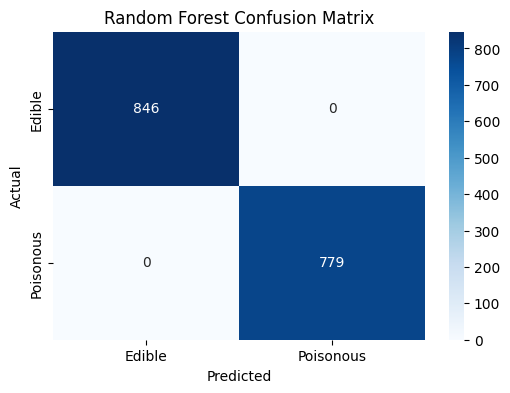

In [90]:
# Predict using the random forest model
rf_y_pred = random_forest.predict(X_test)


print(classification_report(y_test, rf_y_pred))

# RANDOM FOREST PERFORMANCE METRICS

# Create a confusion matrix
confusion = confusion_matrix(y_test, rf_y_pred)
print("Confusion Matrix:")
print(confusion)
# Calculate and print the accuracy based on the confusion matrix
accuracy_from_confusion = round((confusion[0][0] + confusion[1][1]) / len(y_test),4)
print()
print("Accuracy from Random forest confusion matrix:", accuracy_from_confusion)

cm_rf = confusion_matrix(y_test, rf_y_pred)
class_names = ["Edible", "Poisonous"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot= True, fmt= "d", cmap= "Blues", xticklabels= class_names, yticklabels= class_names)
plt.xlabel( "Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

# SVM

In [91]:
#Create a SVM Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [92]:
#Predict the response for test dataset
svm_y_pred = svm_model.predict(X_test)

accuracy = round(accuracy_score(y_test, svm_y_pred),4)
print("SVM:", accuracy)
print()
print(classification_report(y_test, svm_y_pred))

# #Calculate the accuracy of our model
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# print()
# print(classification_report(y_test, svm_y_pred))

SVM: 0.9803

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       846
           1       0.98      0.97      0.98       779

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



SVM Accuracy: 0.9803
Confusion Matrix:
[[834  12]
 [ 20 759]]
Accuracy from KNN confusion matrix: 0.9803


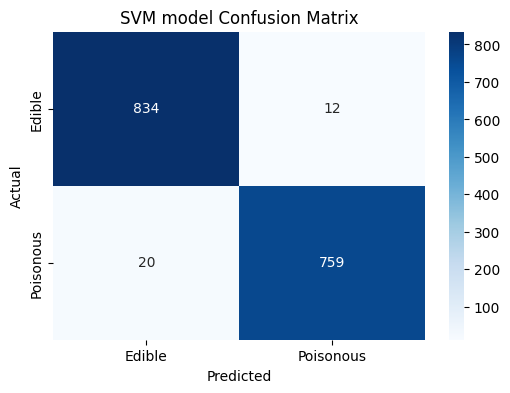

In [93]:
# SVM PERFORMANCE METRICS
# Calculate and print the model's accuracy score
accuracy = round(accuracy_score(y_test, svm_y_pred), 4)
print("SVM Accuracy:", accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, svm_y_pred)
print("Confusion Matrix:")
print(confusion)
# Calculate and print the accuracy based on the confusion matrix
accuracy_from_confusion = round((confusion[0][0] + confusion[1][1]) / len(y_test),4)
print("Accuracy from KNN confusion matrix:", accuracy_from_confusion)

cm_svm = confusion_matrix(y_test, svm_y_pred)
class_names = ["Edible", "Poisonous"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot= True, fmt= "d", cmap= "Blues", xticklabels= class_names, yticklabels= class_names)
plt.xlabel( "Predicted")
plt.ylabel("Actual")
plt.title("SVM model Confusion Matrix")
plt.show()

# Decision Tree

In [94]:
# Create a Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [95]:
# Make predictions on the test data
dtree_y_pred = dtree.predict(X_test)

# Calculate and print the model's accuracy score
accuracy = round(accuracy_score(y_test, dtree_y_pred), 4)
print("Decision Tree Accuracy:", accuracy)

# print the classification report
print(classification_report(y_test, dtree_y_pred))
print()
# Create a confusion matrix
confusion = confusion_matrix(y_test, dtree_y_pred)
print("Confusion Matrix:")
print(confusion)

# Calculate and print the accuracy based on the confusion matrix
accuracy_from_confusion = round((confusion[0][0] + confusion[1][1]) / len(dtree_y_pred), 4)
print("Accuracy from confusion matrix:", accuracy_from_confusion)

# Create default Decision Tree classifer object
decisionTree_model_gini = DecisionTreeClassifier()

# Use entropy criterion
decisionTree_model_entropy = DecisionTreeClassifier(criterion="entropy")

# Use max depth of 3
decisionTree_model_depth3 = DecisionTreeClassifier(max_depth=3)

# Fit the trees
decisionTree_model_gini.fit(X_train,y_train)
decisionTree_model_entropy.fit(X_train,y_train)
decisionTree_model_depth3.fit(X_train,y_train)

# Make prediction
y_pred_gini = decisionTree_model_gini.predict(X_test)
y_pred_entropy = decisionTree_model_entropy.predict(X_test)
y_pred_depth3 = decisionTree_model_depth3.predict(X_test)

print("Accuracy (gini):",metrics.accuracy_score(y_test, y_pred_gini))
print("Accuracy (entropy):",metrics.accuracy_score(y_test, y_pred_entropy))
print("Accuracy (depth3):",metrics.accuracy_score(y_test, y_pred_depth3))



Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Confusion Matrix:
[[846   0]
 [  0 779]]
Accuracy from confusion matrix: 1.0
Accuracy (gini): 1.0
Accuracy (entropy): 1.0
Accuracy (depth3): 0.9649230769230769


Decision Tree Accuracy: 1.0
Confusion Matrix:
[[846   0]
 [  0 779]]
Accuracy from KNN confusion matrix: 1.0


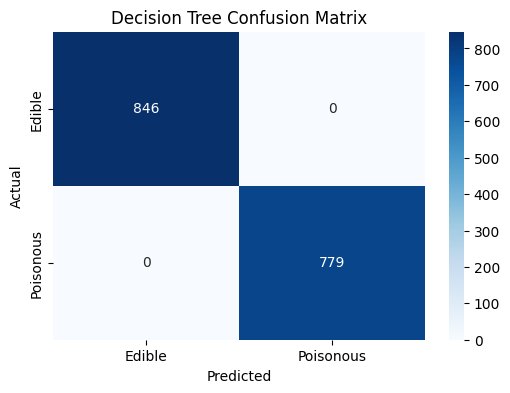

In [96]:
# DECISION TREE PERFORMANCE METRICS
# Calculate and print the model's accuracy score
accuracy = round(accuracy_score(y_test, dtree_y_pred), 4)
print("Decision Tree Accuracy:", accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, dtree_y_pred)
print("Confusion Matrix:")
print(confusion)
# Calculate and print the accuracy based on the confusion matrix
accuracy_from_confusion = round((confusion[0][0] + confusion[1][1]) / len(y_test),4)
print("Accuracy from KNN confusion matrix:", accuracy_from_confusion)

cm_dtree = confusion_matrix(y_test, dtree_y_pred)
class_names = ["Edible", "Poisonous"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dtree, annot= True, fmt= "d", cmap= "Blues", xticklabels= class_names, yticklabels= class_names)
plt.xlabel( "Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Artificial Neural Network

In [97]:
# Define the architecture of your ANN
model = Sequential()

# Add an input layer with the number of input features 
model.add(Dense(64, input_dim=22, activation='relu'))

# Add additional hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Add dropout for regularization

# Add the output layer with one neuron (binary classification)
model.add(Dense(1, activation='sigmoid'))


In [98]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1472      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3585 (14.00 KB)
Trainable params: 3585 (14.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [99]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [100]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100


163/163 [==============================] - 2s 5ms/step - loss: 0.4169 - accuracy: 0.8167 - val_loss: 0.1979 - val_accuracy: 0.9346
Epoch 2/100
163/163 [==============================] - 0s 2ms/step - loss: 0.1872 - accuracy: 0.9308 - val_loss: 0.1085 - val_accuracy: 0.9685
Epoch 3/100
163/163 [==============================] - 0s 2ms/step - loss: 0.1179 - accuracy: 0.9610 - val_loss: 0.0806 - val_accuracy: 0.9792
Epoch 4/100
163/163 [==============================] - 0s 2ms/step - loss: 0.0804 - accuracy: 0.9760 - val_loss: 0.0566 - val_accuracy: 0.9831
Epoch 5/100
163/163 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9842 - val_loss: 0.0398 - val_accuracy: 0.9862
Epoch 6/100
163/163 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.9904 - val_loss: 0.0287 - val_accuracy: 0.9900
Epoch 7/100
163/163 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9912 - val_loss: 0.0214 - val_accuracy: 0.9938
Epoch 8/100

In [101]:
# Train and Test accuracy
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

204/204 [==============================] - 0s 2ms/step - loss: 6.7279e-05 - accuracy: 1.0000
Training Accuracy: 100.00%

51/51 [==============================] - 0s 2ms/step - loss: 4.0684e-05 - accuracy: 1.0000
Testing Accuracy: 100.00%



In [102]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

51/51 [==============================] - 0s 1ms/step


In [103]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions (0 or 1)

# Calculate and print the model's accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("ANN Accuracy:", accuracy)

# Print the classification report
print(classification_report(y_test, y_pred))


51/51 [==============================] - 0s 1ms/step
ANN Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[846   0]
 [  0 779]]


1.0

Confusion Matrix:
[[846   0]
 [  0 779]]

Accuracy from ANN confusion matrix: 1.0


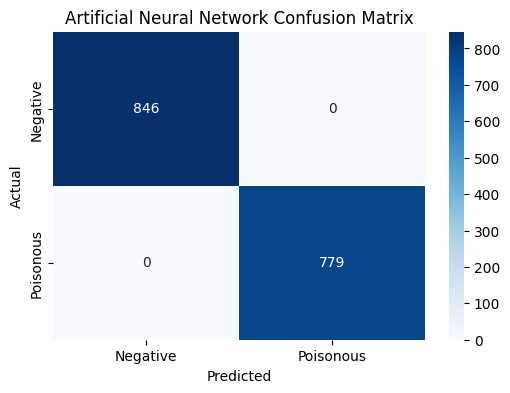

In [105]:
# ARTIFICIAL NEURAL NETWORK PERFORMANCE METRICS

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Calculate and print the accuracy based on the confusion matrix
accuracy_from_confusion = round((confusion[0][0] + confusion[1][1]) / len(y_test),4)
print()
print("Accuracy from ANN confusion matrix:", accuracy_from_confusion)

cm = confusion_matrix(y_test, dtree_y_pred)
class_names = ["Negative", "Poisonous"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dtree, annot= True, fmt= "d", cmap= "Blues", xticklabels= class_names, yticklabels= class_names)
plt.xlabel( "Predicted")
plt.ylabel("Actual")
plt.title("Artificial Neural Network Confusion Matrix")
plt.show()

In [106]:
acc = history.history['accuracy']
loss = history.history['loss']

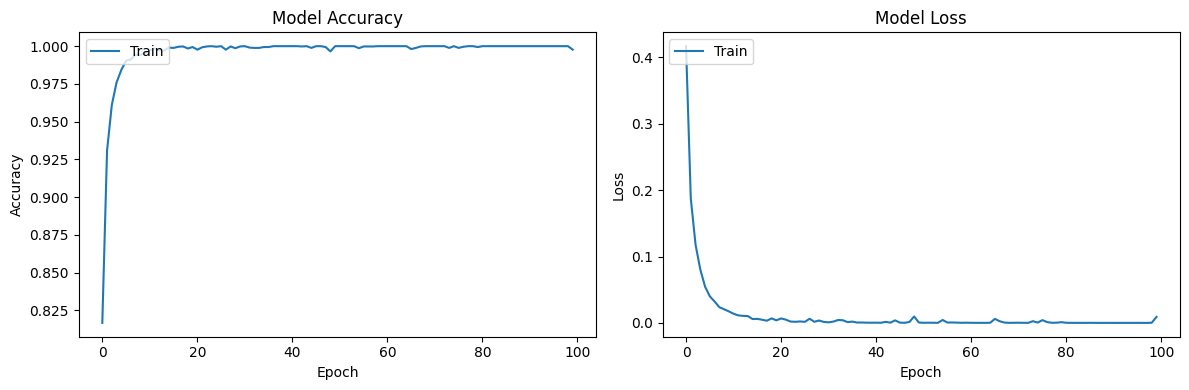

In [107]:
from matplotlib import pyplot as plt

# Create a 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first chart in the first subplot (1x2, subplot 1)
axes[0].plot(history.history['accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train'], loc='upper left')

# Plot the second chart in the second subplot (1x2, subplot 2)
axes[1].plot(history.history['loss'])
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'], loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the combined canvas with both charts
plt.show()


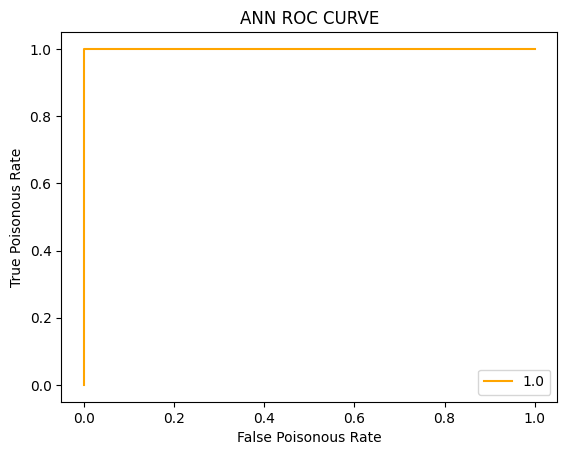

In [108]:
auc_ann = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color = 'orange', label = auc_ann)
plt.xlabel('False Poisonous Rate')
plt.ylabel('True Poisonous Rate')
plt.title('ANN ROC CURVE')
plt.legend()

plt.show()